<a href="https://colab.research.google.com/github/zhaoaxi/noteForOpenGL/blob/master/%E8%BD%A6%E9%99%A9%E5%AE%9A%E4%BB%B7KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from time import sleep
from tqdm import tqdm


In [ ]:
###############数据读入##################

cardata = pd.read_csv('/content/MTPLdata.csv')


In [ ]:
###############数据信息##################
cardata.clm.value_counts()
cardata.clm.value_counts(normalize=True)

0    0.950306
1    0.049694
Name: clm, dtype: float64

In [ ]:
###############哑变量处理#################
cardata['clm'] = cardata['clm'].map(str)
X_raw = cardata.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7]]
X = pd.get_dummies(X_raw)

pd.options.display.max_columns = 30
X.head()

y = cardata['clm']

In [ ]:
###############训练集和测试集##############
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=20000, random_state=1)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

np.mean(X_train_s, axis=0)
np.std(X_train_s, axis=0)
np.mean(X_test_s, axis=0)
np.std(X_test_s, axis=0)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_s, y_train)
model.score(X_test_s, y_test)
pred = model.predict(X_test_s)
pred

pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,18964,42
1,985,9


Model Accuracy: 0.94865


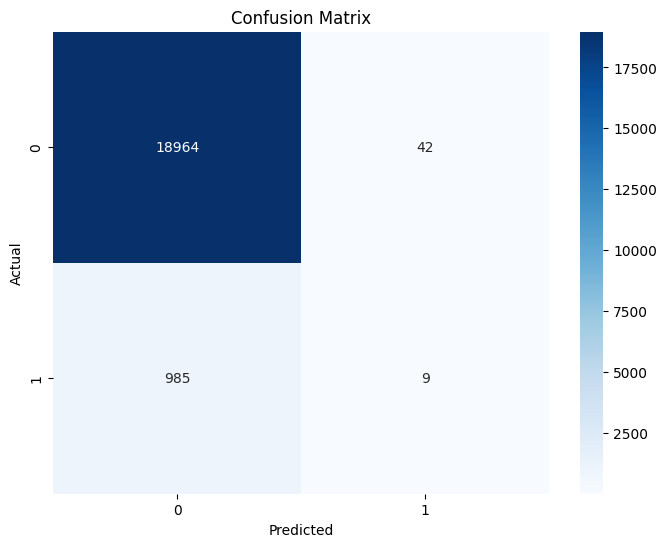

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     19006
           1       0.18      0.01      0.02       994

    accuracy                           0.95     20000
   macro avg       0.56      0.50      0.50     20000
weighted avg       0.91      0.95      0.93     20000



In [ ]:
#@title 默认标题文本
# 使用测试集评估模型的准确性
accuracy = model.score(X_test_s, y_test)
print("Model Accuracy:", accuracy)

# 生成预测结果
pred = model.predict(X_test_s)

# 创建混淆矩阵
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)

# 可视化混淆矩阵
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 创建分类报告
from sklearn.metrics import classification_report

report = classification_report(y_test, pred)
print("Classification Report:")
print(report)


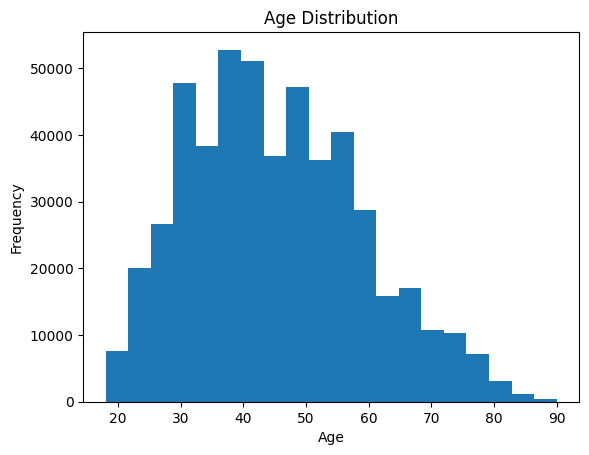

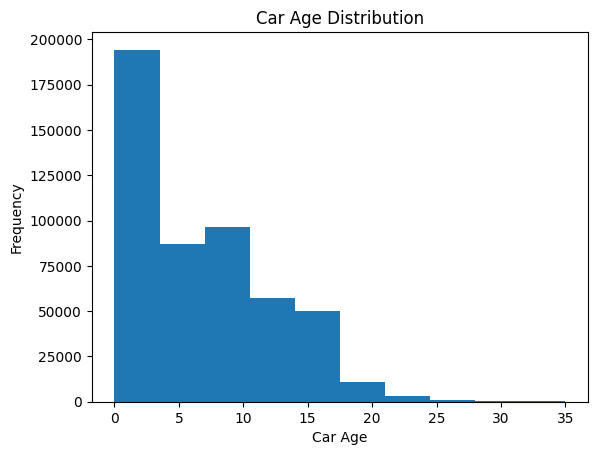

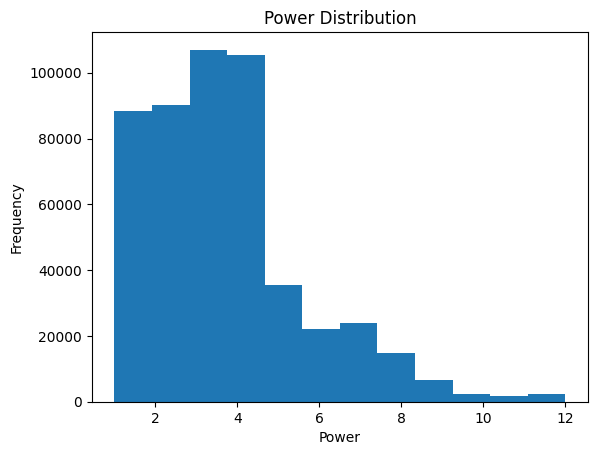

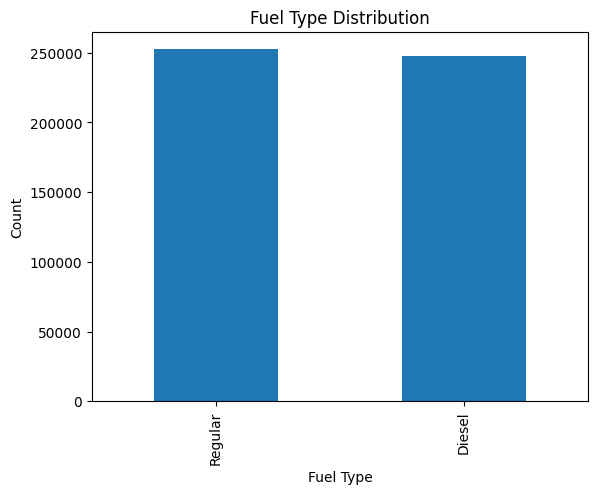

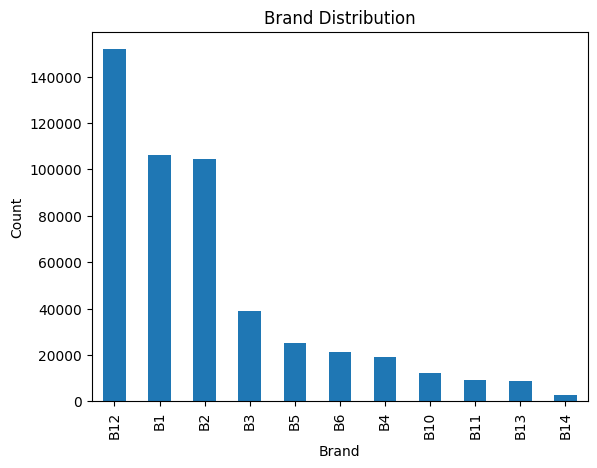

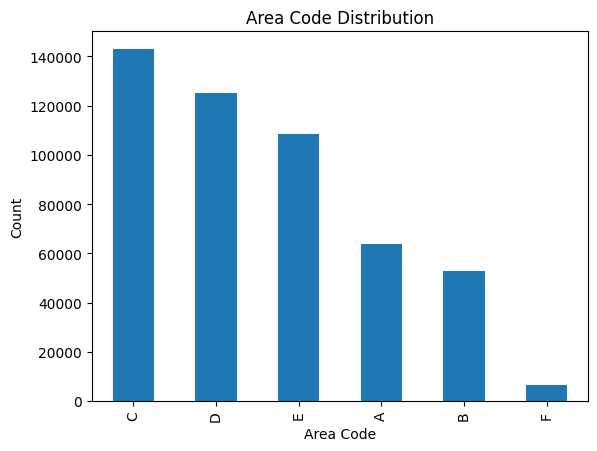

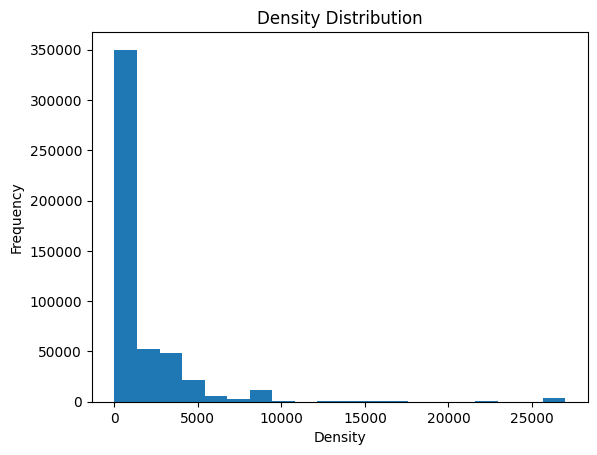

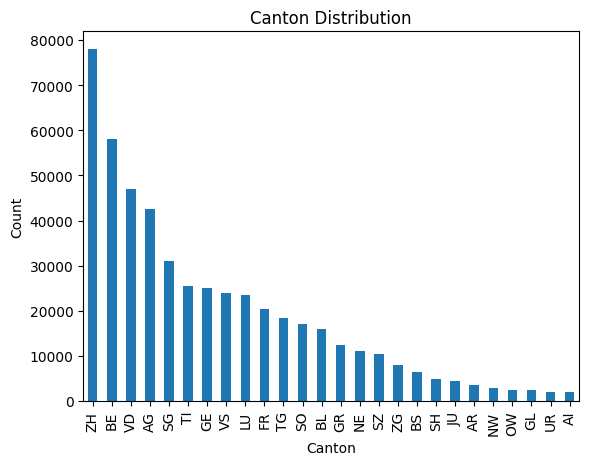

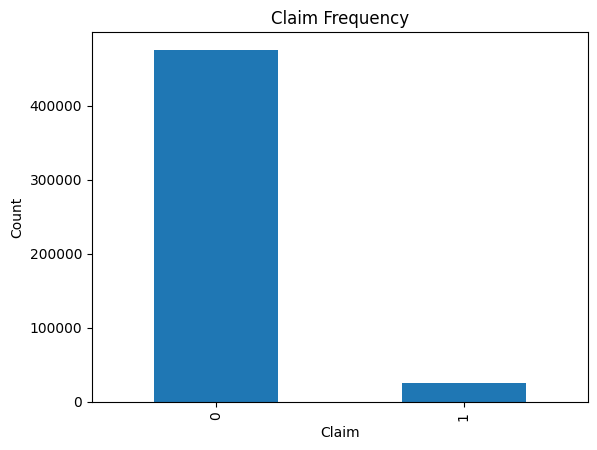

In [ ]:
# 变量分析

# 1. Age Distribution
plt.hist(cardata['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

# 2. Car Age Distribution
plt.hist(cardata['ac'], bins=10)
plt.xlabel('Car Age')
plt.ylabel('Frequency')
plt.title('Car Age Distribution')
plt.show()

# 3. Power Distribution
plt.hist(cardata['power'], bins=12)
plt.xlabel('Power')
plt.ylabel('Frequency')
plt.title('Power Distribution')
plt.show()

# 4. Fuel Type Distribution
cardata['gas'].value_counts().plot(kind='bar')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.title('Fuel Type Distribution')
plt.show()

# 5. Brand Distribution
cardata['brand'].value_counts().plot(kind='bar')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Brand Distribution')
plt.show()

# 6. Area Code Distribution
cardata['area'].value_counts().plot(kind='bar')
plt.xlabel('Area Code')
plt.ylabel('Count')
plt.title('Area Code Distribution')
plt.show()

# 7. Density Distribution
plt.hist(cardata['dens'], bins=20)
plt.xlabel('Density')
plt.ylabel('Frequency')
plt.title('Density Distribution')
plt.show()

# 8. Canton Distribution
cardata['ct'].value_counts().plot(kind='bar')
plt.xlabel('Canton')
plt.ylabel('Count')
plt.title('Canton Distribution')
plt.show()

# 9. Claim Frequency
cardata['clm'].value_counts().plot(kind='bar')
plt.xlabel('Claim')
plt.ylabel('Count')
plt.title('Claim Frequency')
plt.show()